In [1]:
import sys
import os
from pathlib import Path
sys.path.append(str(Path.cwd().parent.joinpath('code')))

In [2]:
from hydro_stats import *

<h1>Statystyki</h1>

<h2>Hydro</h2>

In [3]:
parameter = "Q"
station = StationData(station_id=150160180, parameter=parameter)
station.station_data_to_df(start_year=1960)

,station_id,year,winter_min,winter_mean,winter_max,summer_min,summer_mean,summer_max,year_mean
0,150160180,1960,2.14,7.54,34.4,4.24,9.62,96.0,8.59
1,150160180,1961,3.40,9.72,74.0,1.50,6.81,39.0,8.25
2,150160180,1962,2.84,14.00,104.0,2.40,9.28,177.0,11.60
3,150160180,1963,2.19,8.96,58.2,2.90,10.40,70.9,9.69
4,150160180,1964,3.60,9.62,37.6,4.75,15.40,340.0,12.50
...,...,...,...,...,...,...,...,...,...
58,150160180,2018,4.32,12.00,38.9,1.62,4.49,26.1,8.21
59,150160180,2019,1.16,10.60,55.5,2.06,7.27,73.7,8.91
60,150160180,2020,3.00,9.78,93.0,3.25,22.50,265.0,16.20
61,150160180,2021,4.98,16.10,99.3,3.69,11.40,113.0,13.70


In [4]:
station.basic_stats()


Number of observations: 63
WWQ: 1340.0	 SWQ: 124.86	 NWQ: 20.9
WSQ: 20.6	 SSQ: 12.80	 NSQ: 7.1
WNQ: 7.8	 SNQ: 3.95	 NNQ: 1.16

      winter_min  winter_mean  winter_max  summer_min  summer_mean  \
mean       3.946       13.818      90.181       3.946       11.807   
std        1.359        3.634      46.966       1.625        4.926   
min        1.160        6.320      28.000       1.240        4.110   
25%        3.100       11.100      56.850       2.910        7.900   
50%        3.790       13.800      80.000       4.180       10.800   
75%        4.700       16.900     103.000       4.825       15.100   
max        7.800       21.200     244.000       7.700       23.800   

      summer_max  year_mean  year_max  year_min  
mean     159.535     12.797   182.719     3.284  
std      190.508      3.273   181.216     1.275  
min       20.900      7.100    38.900     1.160  
25%       59.350     10.300    90.000     2.305  
50%      106.000     12.400   145.000     3.200  
75%      18

,station_id,year,winter_min,winter_mean,winter_max,summer_min,summer_mean,summer_max,year_mean,year_max,year_min
0,150160180,1960,2.14,7.54,34.4,4.24,9.62,96.0,8.59,96.0,2.14
1,150160180,1961,3.40,9.72,74.0,1.50,6.81,39.0,8.25,74.0,1.50
2,150160180,1962,2.84,14.00,104.0,2.40,9.28,177.0,11.60,177.0,2.40
3,150160180,1963,2.19,8.96,58.2,2.90,10.40,70.9,9.69,70.9,2.19
4,150160180,1964,3.60,9.62,37.6,4.75,15.40,340.0,12.50,340.0,3.60
...,...,...,...,...,...,...,...,...,...,...,...
58,150160180,2018,4.32,12.00,38.9,1.62,4.49,26.1,8.21,38.9,1.62
59,150160180,2019,1.16,10.60,55.5,2.06,7.27,73.7,8.91,73.7,1.16
60,150160180,2020,3.00,9.78,93.0,3.25,22.50,265.0,16.20,265.0,3.00
61,150160180,2021,4.98,16.10,99.3,3.69,11.40,113.0,13.70,113.0,3.69


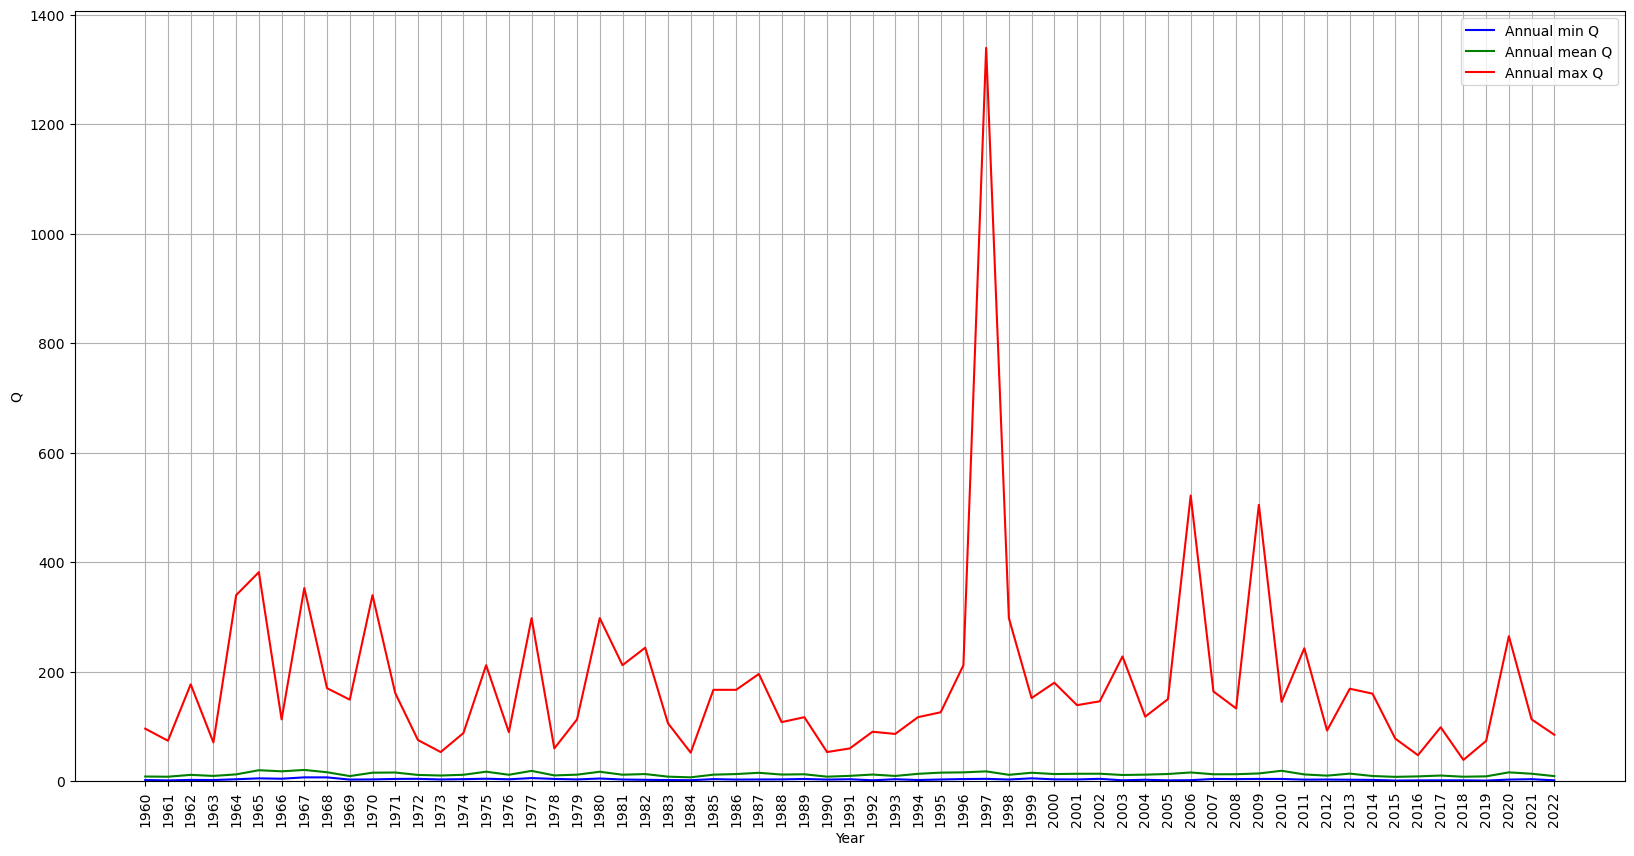

1

In [5]:
station.plt_annual_data()

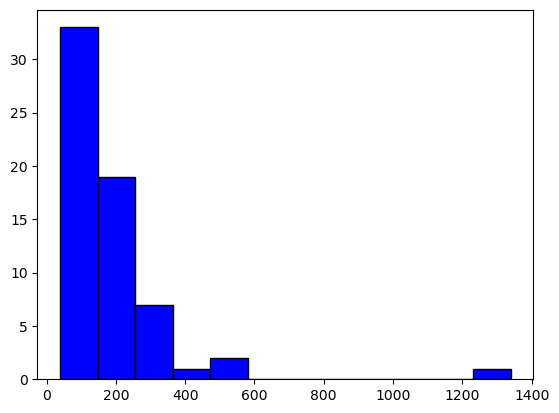

1

In [6]:
station.plt_histogram(bins=12)

<h3>Przewyższenie przepływu</h3>

<b>Poprawność obliczeń prawdopodobieństw przewyższenia lub nieosiągnięcia przepływów nie została zweryfikowana!</b>

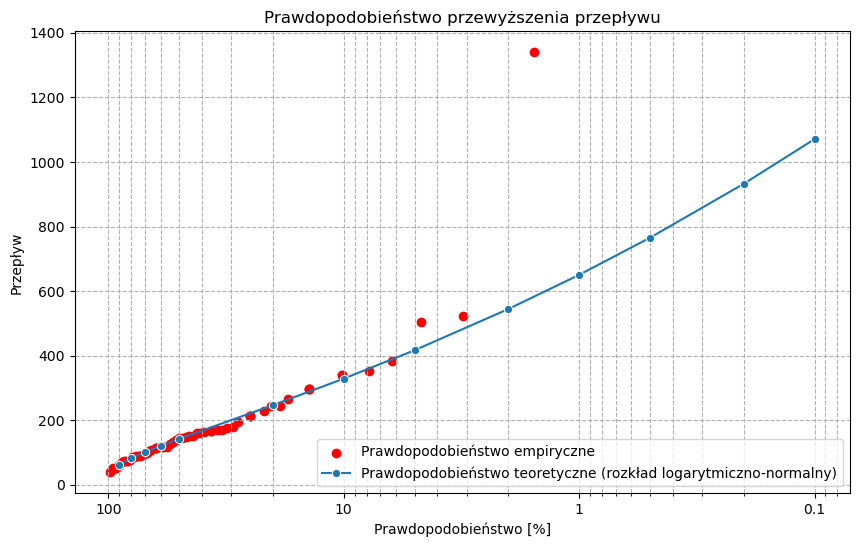

In [7]:
log_normal_analysis = LogNormalAnalysis(station._data)
log_normal_analysis.plot()

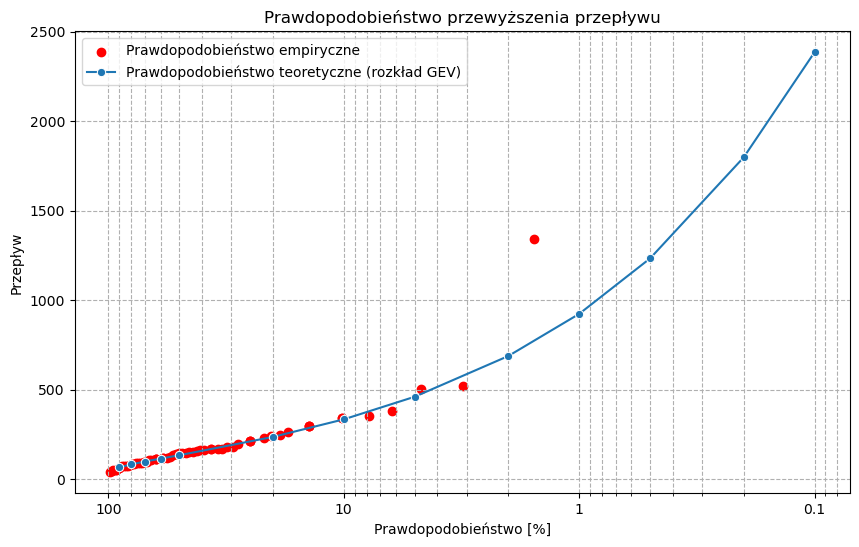

In [8]:
gen_extreme_analysis = GenExtremeAnalysis(station._data)
gen_extreme_analysis.plot()

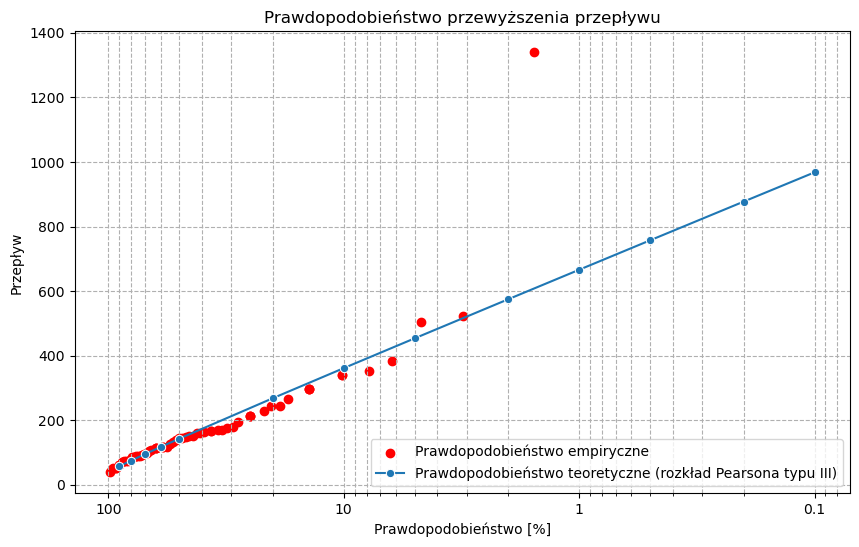

In [9]:
pearson_III_analysis = PearsonIIIAnalysis(station._data)
pearson_III_analysis.plot()

Sprawdzenie zgodności krzywych testem Kołmogorowa

In [10]:
log_normal_analysis.test_ks()

Statystyka testu KS: 0.07580864225790906, p-wartość: 0.8351047278128538


(0.07580864225790906, 0.8351047278128538)

In [11]:
gen_extreme_analysis.test_ks()

Statystyka testu KS: 0.059151818991414695, p-wartość: 0.9708728745225366


(0.059151818991414695, 0.9708728745225366)

In [12]:
pearson_III_analysis.test_ks()

Statystyka testu KS: 0.09665931307434705, p-wartość: 0.5651320494906896


(0.09665931307434705, 0.5651320494906896)

<h3>Nieosiągnięcie przepływu</h3>

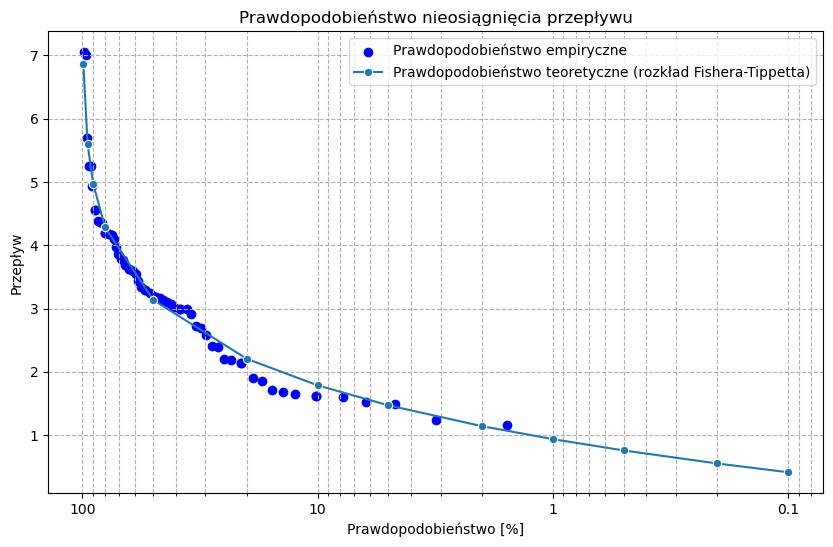

In [13]:
FT_analysis = FisherTippettAnalysis(station._data)
FT_analysis.plot()

Sprawdzenie poprawności krzywej testem Kołmogorowa

In [14]:
FT_analysis.test_ks()

Statystyka testu KS: 0.10215855103778027, p-wartość: 0.4946697284973872


(0.10215855103778027, 0.4946697284973872)

<h2>Meteo</h2>

In [15]:
from meteo_stats import *

In [16]:
meteo_station1 = MeteoStationData(station_id=249180160)

In [17]:
csv_path1 = r'E:\OneDrive\Dokumenty\Programowanie\IMGWTools\data\downloaded\dane_meteorologiczne\dobowe\klimat\2022\k_d_01_2022.csv'
df1 = meteo_station1.station_data_to_df(csv_path=csv_path1)
df1.head()

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Dzień,Maksymalna temperatura dobowa,Status pomiaru TMAX,Minimalna temperatura dobowa,Status pomiaru TMIN,Średnia temperatura dobowa,Status pomiaru STD,Temperatura minimalna przy gruncie,Status pomiaru TMNG,Suma dobowa opadów,Status pomiaru SMDB,Rodzaj opadu,Wysokość pokrywy śnieżnej,Status pomiaru PKSN
31,249180160,BRENNA,2022,1,1,13.0,NaN,8.4,NaN,10.0,NaN,11.2,NaN,8.1,NaN,W,0,9.0
32,249180160,BRENNA,2022,1,2,11.7,NaN,6.9,NaN,9.1,NaN,8.6,NaN,0.1,NaN,W,0,9.0
33,249180160,BRENNA,2022,1,3,11.0,NaN,7.2,NaN,9.2,NaN,8.7,NaN,12.4,NaN,W,0,9.0
34,249180160,BRENNA,2022,1,4,10.8,NaN,4.4,NaN,7.7,NaN,8.6,NaN,9.3,NaN,W,0,9.0
35,249180160,BRENNA,2022,1,5,9.6,NaN,0.9,NaN,4.3,NaN,0.7,NaN,3.2,NaN,W,0,9.0


In [18]:
meteo_station1.basic_stats(df1)


Liczba obserwacji: 31
Temperatura maksumalna: 13.0
 Temperatura średnia: 1.01
 Temperatura minimalna: -10.4


1

In [19]:
meteo_station2 = MeteoStationData(station_id=249190560)
csv_path2 = r'E:\OneDrive\Dokumenty\Programowanie\IMGWTools\data\downloaded\dane_meteorologiczne\dobowe\klimat\2022\k_d_t_01_2022.csv'
df2 = meteo_station2.station_data_to_df(csv_path=csv_path2)
df2.head()

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Dzień,Średnia dobowa temperatura,Status pomiaru TEMP,Średnia dobowa wilgotność względna,Status pomiaru WLGS,Średnia dobowa prędkość wiatru,Status pomiaru FWS,Średnie dobowe zachmurzenie ogólne,Status pomiaru NOS
62,249190560,JABŁONKA,2022,1,1,6.9,NaN,0.0,8.0,1.7,NaN,8.0,NaN
63,249190560,JABŁONKA,2022,1,2,4.5,NaN,0.0,8.0,1.0,NaN,7.3,NaN
64,249190560,JABŁONKA,2022,1,3,5.3,NaN,0.0,8.0,2.0,NaN,7.0,NaN
65,249190560,JABŁONKA,2022,1,4,5.3,NaN,0.0,8.0,2.7,NaN,7.7,NaN
66,249190560,JABŁONKA,2022,1,5,4.0,NaN,0.0,8.0,2.0,NaN,8.0,NaN


In [20]:
meteo_station2.basic_stats(df2)


Liczba obserwacji: 31
Temperatura średnia: -2.67


1

In [21]:
meteo_station3 = MeteoStationData(station_id=249180050)
csv_path3 = r'E:\OneDrive\Dokumenty\Programowanie\IMGWTools\data\downloaded\dane_meteorologiczne\dobowe\opad\2022\o_d_01_2022.csv'
df3 = meteo_station3.station_data_to_df(csv_path=csv_path3)
df3.head()

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Dzień,Suma dobowa opadów,Status pomiaru SMDB,Rodzaj opadu,Wysokość pokrywy śnieżnej,Status pomiaru PKSN,Wysokość świeżospadłego śniegu,Status pomiaru HSS,Gatunek śniegu,Status pomiaru GATS,Rodzaj pokrywy śnieżnej,Status pomiaru RPSN
42,249180050,GOCZAŁKOWICE-ZDRÓJ,2022,1,1,4.2,NaN,W,0,9.0,0,9.0,NaN,9.0,.,NaN
43,249180050,GOCZAŁKOWICE-ZDRÓJ,2022,1,3,8.0,NaN,W,0,9.0,0,9.0,NaN,9.0,.,NaN
44,249180050,GOCZAŁKOWICE-ZDRÓJ,2022,1,4,2.1,NaN,W,0,9.0,0,9.0,NaN,9.0,.,NaN
45,249180050,GOCZAŁKOWICE-ZDRÓJ,2022,1,5,2.7,NaN,W,0,9.0,0,9.0,NaN,9.0,.,NaN
46,249180050,GOCZAŁKOWICE-ZDRÓJ,2022,1,6,1.3,NaN,S,0,9.0,0,9.0,NaN,9.0,.,NaN


In [22]:
meteo_station3.basic_stats(df3)


Liczba obserwacji: 20
Suma dobowa opadów:  41.50



1

In [23]:
meteo_station4 = MeteoStationData(station_id=249200020)
csv_path4 = r'E:\OneDrive\Dokumenty\Programowanie\IMGWTools\data\downloaded\dane_meteorologiczne\miesieczne\klimat\2022\k_m_d_2022.csv'
df4 = meteo_station4.station_data_to_df(csv_path=csv_path4)
df4.head()

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Absolutna temperatura maksymalna,Status pomiaru TMAX,Średnia temperatura maksymalna,Status pomiaru TMXS,Absolutna temperatura minimalna,Status pomiaru TMIN,...,Status pomiaru SUMM,Maksymalna dobowa suma opadów,Status pomiaru OPMX,Pierwszy dzień wystąpienia opadu maksymalnego,Ostatni dzień wystąpienia opadu maksymalnego,Maksymalna wysokość pokrywy śnieżnej,Status pomiaru PKSN,Liczba dni z pokrywą śnieżną,Liczba dni z opadem deszczu,Liczba dni z opadem śniegu
60,249200020,ŁAZY,2022,1,12.7,NaN,4.0,NaN,-11.6,NaN,...,NaN,5.4,NaN,5,NaN,2,NaN,10,5,11
61,249200020,ŁAZY,2022,2,13.0,NaN,7.5,NaN,-5.1,NaN,...,NaN,6.1,NaN,17,NaN,2,NaN,3,10,7
62,249200020,ŁAZY,2022,3,20.4,NaN,9.5,NaN,-10.5,NaN,...,NaN,17.5,NaN,31,NaN,2,NaN,1,3,4
63,249200020,ŁAZY,2022,4,20.9,NaN,11.4,NaN,-3.7,NaN,...,NaN,12.5,NaN,25,NaN,12,NaN,4,13,4
64,249200020,ŁAZY,2022,5,27.2,NaN,20.8,NaN,0.9,NaN,...,NaN,8.2,NaN,25,NaN,0,NaN,0,10,0


In [24]:
meteo_station4.basic_stats(df4)


Liczba obserwacji: 12
Absolutna temperatura maksymalna: 36.0	 Średnia temperatura maksymalna: 14.85
Średnia temperatura miesięczna:   9.64
Absolutna temperatura minimalna:  -14.8	 Średnia temperatura minimalna:  -2.90


1

In [25]:
meteo_station41 = MeteoStationData(station_id=249180010)
csv_path41 = r'E:\OneDrive\Dokumenty\Programowanie\IMGWTools\data\downloaded\dane_meteorologiczne\miesieczne\klimat\2022\k_m_t_2022.csv'
df41 = meteo_station41.station_data_to_df(csv_path=csv_path41)
df41.head()

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Średnia miesięczna temperatura,Status pomiaru TEMP,Średnia miesięczna wilgotność względna,Status pomiaru WLGS,Średnia miesięczna prędkość wiatru,Status pomiaru FWS,Średnie miesięczne zachmurzenie ogólne,Status pomiaru NOS
0,249180010,PSZCZYNA,2022,1,0.3,NaN,0.0,8.0,0.0,8.0,6.2,NaN
1,249180010,PSZCZYNA,2022,2,3.3,NaN,0.0,8.0,0.0,8.0,5.3,NaN
2,249180010,PSZCZYNA,2022,3,3.1,NaN,0.0,8.0,0.0,8.0,0.0,8.0
3,249180010,PSZCZYNA,2022,4,6.4,NaN,0.0,8.0,0.0,8.0,5.7,NaN
4,249180010,PSZCZYNA,2022,5,14.5,NaN,0.0,8.0,0.0,8.0,4.4,NaN


In [26]:
meteo_station41.basic_stats(df41)


Liczba obserwacji: 12
Średnia miesięczna temperatura:     9.38
Średnia miesięczna prędkość wiatru: 0.00


1

In [27]:
meteo_station5 = MeteoStationData(station_id=249180050)
csv_path5 = r'E:\OneDrive\Dokumenty\Programowanie\IMGWTools\data\downloaded\dane_meteorologiczne\miesieczne\opad\2022\o_m_2022.csv'
df5 = meteo_station5.station_data_to_df(csv_path=csv_path5)
df5.head()

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Miesięczna suma opadów,Status pomiaru SUMM,Liczba dni z opadem śniegu,Status pomiaru LDS,Opad maksymalny,Status pomiaru MAXO,Dzień pierwszy wystąpienia opadu maksymalnego,Dzień ostatni wystąpienia opadu maksymalnego,Liczba dni z pokrywą śnieżną,Status pomiaru LDPS
24,249180050,GOCZAŁKOWICE-ZDRÓJ,2022,1,41.5,NaN,11,NaN,8.0,NaN,3.0,NaN,0,NaN
25,249180050,GOCZAŁKOWICE-ZDRÓJ,2022,2,38.6,NaN,5,NaN,7.1,NaN,17.0,NaN,0,NaN
26,249180050,GOCZAŁKOWICE-ZDRÓJ,2022,3,28.1,NaN,3,NaN,10.6,NaN,31.0,NaN,0,NaN
27,249180050,GOCZAŁKOWICE-ZDRÓJ,2022,4,53.6,NaN,3,NaN,8.1,NaN,24.0,NaN,0,NaN
28,249180050,GOCZAŁKOWICE-ZDRÓJ,2022,5,33.4,NaN,0,NaN,7.5,NaN,27.0,NaN,0,NaN


In [28]:
meteo_station5.basic_stats(df5)


Liczba obserwacji: 12
Miesięczna suma opadów:  680.4
Opad maksymalny: 52.8


1

In [29]:
meteo_station6 = MeteoStationData(station_id=349190600)
csv_path6 = r'E:\OneDrive\Dokumenty\Programowanie\IMGWTools\data\downloaded\dane_meteorologiczne\miesieczne\synop\2022\s_m_d_2022.csv'
df6 = meteo_station6.station_data_to_df(csv_path=csv_path6)
df6.head()

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Absolutna temperatura maksymalna,Status pomiaru TMAX,Średnia temperatura maksymalna,Status pomiaru TMXS,Absolutna temperatura minimalna,Status pomiaru TMIN,...,Liczba dni z wiatrem >= 10m/s,Status pomiaru W10D,Liczba dni z wiatrem >15m/s,Status pomiaru W15D,Liczba dni z burzą,Status pomiaru BURD,Liczba dni z rosą,Status pomiaru ROSD,Liczba dni ze szronem,Status pomiaru SZRD
0,349190600,BIELSKO-BIAŁA,2022,1,12.4,NaN,3.2,NaN,-12.5,NaN,...,0,9.0,0,9.0,0,9.0,0,9.0,0,9.0
1,349190600,BIELSKO-BIAŁA,2022,2,11.3,NaN,6.6,NaN,-5.1,NaN,...,0,9.0,0,9.0,0,9.0,0,9.0,0,9.0
2,349190600,BIELSKO-BIAŁA,2022,3,19.5,NaN,8.8,NaN,-7.4,NaN,...,0,9.0,0,9.0,0,9.0,0,9.0,0,9.0
3,349190600,BIELSKO-BIAŁA,2022,4,21.4,NaN,10.9,NaN,-3.1,NaN,...,0,9.0,0,9.0,0,9.0,0,9.0,0,9.0
4,349190600,BIELSKO-BIAŁA,2022,5,26.5,NaN,19.8,NaN,3.3,NaN,...,0,9.0,0,9.0,0,9.0,0,9.0,0,9.0


In [30]:
meteo_station6.basic_stats(df6)


Liczba obserwacji: 12
Absolutna temperatura maksymalna: 33.0	 Średnia temperatura maksymalna: 14.09
Średnia temperatura miesięczna:   9.72
Absolutna temperatura minimalna:  -14.5	 Średnia temperatura minimalna:  -2.30


1

In [31]:
meteo_station7 = MeteoStationData(station_id=349190600)
csv_path7 = r'E:\OneDrive\Dokumenty\Programowanie\IMGWTools\data\downloaded\dane_meteorologiczne\miesieczne\synop\2022\s_m_t_2022.csv'
df7 = meteo_station7.station_data_to_df(csv_path=csv_path7)
df7.head()

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Średnie miesięczne zachmurzenie ogólne,Status pomiaru NOS,Średnia miesięczna prędkość wiatru,Status pomiaru FWS,Średnia miesięczna temperatura,Status pomiaru TEMP,...,Średnia miesięczna wilgotność względna,Status pomiaru WLGS,Średnie miesięczne ciśnienie na poziomie stacji,Status pomiaru PPPS,Średnie miesięczne ciśnienie na poziomie morza,Status pomiaru PPPM,Suma opadu dzień,Status pomiaru WODZ,Suma opadu noc,Status pomiaru WONO
0,349190600,BIELSKO-BIAŁA,2022,1,0.0,8.0,4.7,NaN,0.6,NaN,...,80.8,NaN,971.9,NaN,1021.7,NaN,24.5,NaN,21.9,NaN
1,349190600,BIELSKO-BIAŁA,2022,2,0.0,8.0,5.6,NaN,3.4,NaN,...,71.5,NaN,968.3,NaN,1017.4,NaN,22.2,NaN,15.3,NaN
2,349190600,BIELSKO-BIAŁA,2022,3,0.0,8.0,2.9,NaN,3.4,NaN,...,59.4,NaN,978.0,NaN,1027.5,NaN,5.2,NaN,15.6,NaN
3,349190600,BIELSKO-BIAŁA,2022,4,0.0,8.0,3.5,NaN,6.6,NaN,...,68.5,NaN,966.0,NaN,1014.4,NaN,33.1,NaN,26.2,NaN
4,349190600,BIELSKO-BIAŁA,2022,5,0.0,8.0,2.8,NaN,14.4,NaN,...,62.8,NaN,971.1,NaN,1018.4,NaN,30.3,NaN,14.5,NaN


In [32]:
meteo_station7.basic_stats(df7)


Liczba obserwacji: 12
Średnia temperatura powietrza:       9.71
Średnia miesięczna prędkość wiatru:  3.30



1

In [33]:
meteo_station8 = MeteoStationData(station_id=249180010)
csv_path8 = r'E:\OneDrive\Dokumenty\Programowanie\IMGWTools\data\downloaded\dane_meteorologiczne\terminowe\klimat\2022\k_t_01_2022.csv'
df8 = meteo_station8.station_data_to_df(csv_path=csv_path8)
df8.head()

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Dzień,Godzina,Temperatura powietrza,Status pomiaru TEMP,Temperatura termometru zwilżonego,Status pomiaru TTZW,...,Wilgotność względna,Status pomiaru WLGW,Kod kierunku wiatru,Status pomiaru DKDK,Prędkość wiatru,Status pomiaru FWR,Zachmurzenie ogólne,Status pomiaru ZOGK,Widzialność,Status pomiaru WID
0,249180010,PSZCZYNA,2022,1,1,6,8.9,NaN,0.0,8.0,...,0,8.0,NaN,8.0,0,8.0,8,NaN,6,NaN
1,249180010,PSZCZYNA,2022,1,1,12,11.2,NaN,0.0,8.0,...,0,8.0,NaN,8.0,0,8.0,8,NaN,6,NaN
2,249180010,PSZCZYNA,2022,1,1,18,8.9,NaN,0.0,8.0,...,0,8.0,NaN,8.0,0,8.0,8,NaN,6,NaN
3,249180010,PSZCZYNA,2022,1,2,6,5.6,NaN,0.0,8.0,...,0,8.0,NaN,8.0,0,8.0,4,NaN,8,NaN
4,249180010,PSZCZYNA,2022,1,2,12,11.6,NaN,0.0,8.0,...,0,8.0,NaN,8.0,0,8.0,2,NaN,8,NaN


In [34]:
meteo_station8.basic_stats(df8)


Liczba obserwacji: 93
Średnia temperatura powietrza:  0.82
Średnia prędkość wiatru:        0.00


1